# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.

Given the model generated for us using different kinds of classifier such as random forest. Why did you choose a specific model to present to us. Is it because of precision sore, accuracy score or f1 score.

Import our Libraries

In [61]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report
from scipy import optimize
import matplotlib.pyplot as plt

Load the data dataset into a dataframe


In [62]:
df = pd.read_csv('data.csv')

Reading of dataset columns.

In [63]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Checking if column has missing values.

In [64]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

Number of Bankrupt vs non-bankrupt

In [65]:
df['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

Separate the data into features and target class.

In [ ]:
# Separate the features (x) and the target variable (y)
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

In [ ]:
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_scaled = scaler.fit_transform(x)


In [ ]:
# Split the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
n_estimators = 50
n_depth = 5

for i in range(5):   # 5 iterations
    model = RandomForestClassifier(n_estimators=n_estimators,
                                   max_depth=n_depth,
                                   oob_score=True)
    model.fit(X_train, y_train)

In [70]:
predictions = model.predict(X_test)

Create and plot confusion Matrix

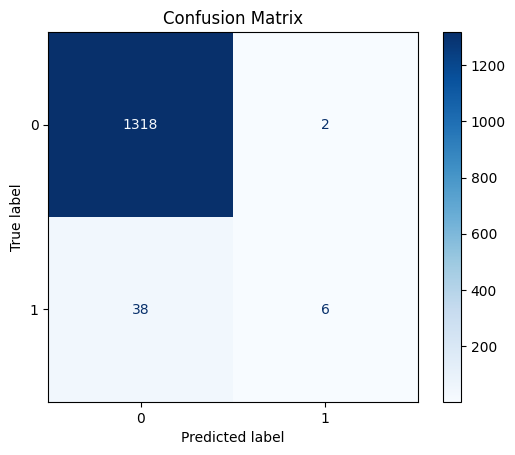

Confusion Matrix:
 [[1318    2]
 [  38    6]]


In [71]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:\n", cm)


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1320
           1       0.75      0.14      0.23        44

    accuracy                           0.97      1364
   macro avg       0.86      0.57      0.61      1364
weighted avg       0.96      0.97      0.96      1364



Calculating and printing of f1 and AUC score

In [73]:
auc = accuracy_score(y_test, predictions)
f1_score = f1_score(y_test, predictions)

print(f'AUC Score: {auc:.3f}')
print(f'F1 Score: {f1_score:.3f}')



AUC Score: 0.971
F1 Score: 0.231


Important features relating to company bankrupcy


In [77]:
important_feature = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': important_feature
}).sort_values(by='Importance', ascending=False)

print("\nImportant Features in Random Forest:\n", importance_df.head())



Important Features in Random Forest:
                                      Feature  Importance
89        Net Income to Stockholder's Equity    0.074962
36                              Debt ratio %    0.048375
18   Persistent EPS in the Last Four Seasons    0.044959
42     Net profit before tax/Paid-in capital    0.044437
94                       Equity to Liability    0.034742
